**SPAM HAM CLASSIFICATION PROJECT**


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['label', 'message'])


In [ ]:
df

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull()

,label,message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5563,False,False
5564,False,False
5565,False,False
5566,False,False


In [ ]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
df.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
print(stop_words)

{'didn', 'of', 'most', 'couldn', 'being', 'up', 'been', 'that', 'under', 'during', 'then', 'shouldn', 'as', 're', 'theirs', 'more', "mightn't", 'same', 'hasn', "you've", "weren't", 'the', 'aren', 'doesn', 'off', 'll', 'you', 'isn', 'did', 'to', 'before', "hadn't", 'when', 'each', 'by', 'but', "don't", 'they', 'we', 'while', 'until', "wouldn't", 'between', 'm', "aren't", 'doing', 'only', 'very', 'all', 'wasn', 'from', 'd', 'is', 'over', 'it', 'me', 'ours', 'yourselves', 'your', 'themselves', 'have', 'shan', 'had', 't', 'mightn', "you're", 'on', 'haven', "shan't", 'herself', 'am', 'below', 'ma', 'can', 'both', 'nor', 'my', 'in', 'those', 'few', 'no', 'has', 's', 'further', 'if', 'wouldn', 'won', 'what', 'does', 'don', "hasn't", 'who', 'not', 'yourself', 'a', "couldn't", 'how', 'o', 'which', 'himself', 'itself', "that'll", 'through', 'ourselves', 'for', 'above', 'down', 'again', 'about', "wasn't", 'such', "you'd", 'against', 'now', 'hadn', "won't", 'other', 'was', 'yours', 'he', 'out', 'a

In [ ]:
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in nltk.word_tokenize(x.lower()) 
                                                       if term not in stop_words and term.isalpha()))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer()

In [ ]:
X = count_vectorizer.fit_transform(df['message'])
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Accuracy:  0.9670855774985039
Confusion Matrix: 
 [[1407   38]
 [  17  209]]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
cm= confusion_matrix(y_test, predictions)

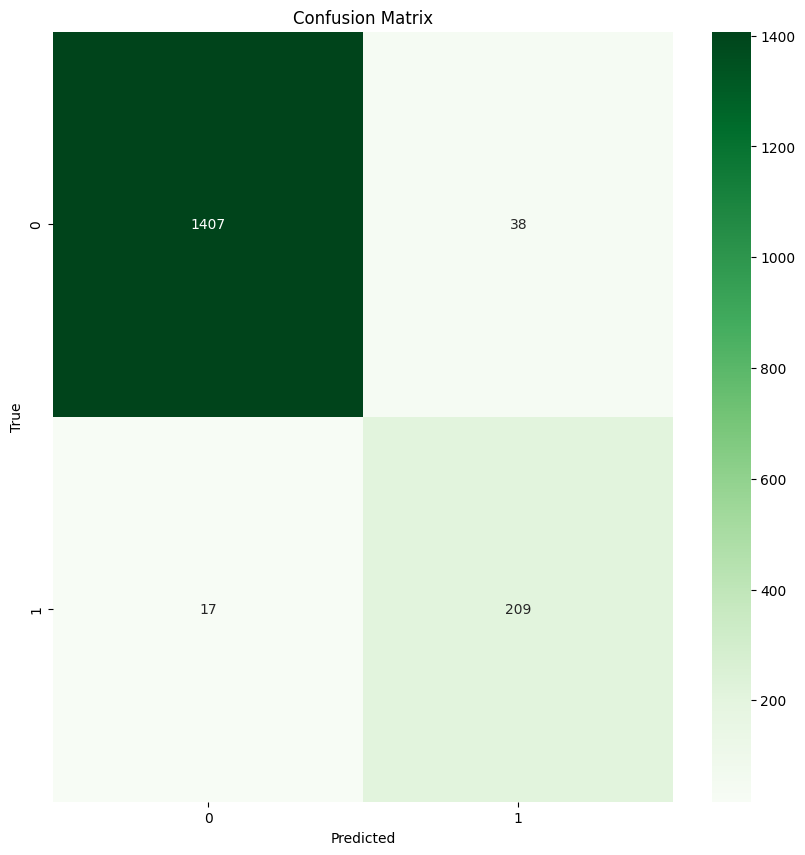

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()